In [5]:
!pip install pyod matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.2-py3-none-any.whl size=198469 sha256=435d56a80d43ca70dd71aa6941e861576012389a6acc1122143e436cf9757158
  Stored in directory: /root/.cache/pip/wheels/77/c2/20/34d1f15b41b701ba69f42a32304825810d680754d509f91391
Successfully built pyod


In [6]:
import numpy as np
import pandas as pd
from pyod.models.iforest import IForest
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic dataset (multivariate)
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.7, random_state=42)

# Convert to a DataFrame
data = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

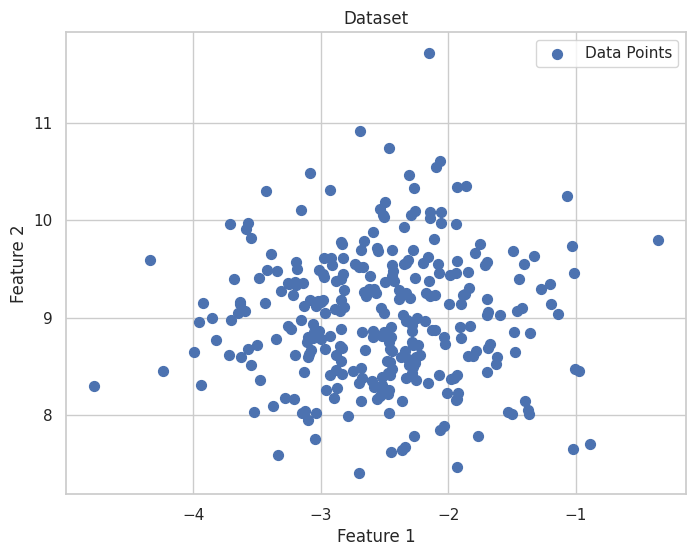

In [7]:
# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(data['Feature_1'], data['Feature_2'], s=50, label="Data Points")
plt.title("Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [8]:
from pyod.models.iforest import IForest
from sklearn.preprocessing import StandardScaler

# Standardize the features (as IsolationForest works better on scaled data)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['Feature_1', 'Feature_2']])

# Initialize the IsolationForest model
clf = IForest(contamination=0.1, random_state=42)

# Fit the model on the scaled data (as a numpy array)
clf.fit(scaled_features)

# Predict anomalies
data['Anomaly'] = clf.labels_  # 1: Anomaly, 0: Normal

# Calculate anomaly scores
data['Anomaly_Score'] = clf.decision_function(scaled_features)

# View results
print(data.head())

   Feature_1  Feature_2  Anomaly  Anomaly_Score
0  -2.280348   8.860916        0      -0.125052
1  -1.986092   9.441545        0      -0.111430
2  -2.930392  10.310881        1       0.002945
3  -2.429735   9.477778        0      -0.122632
4  -4.239349   8.456459        1       0.056041


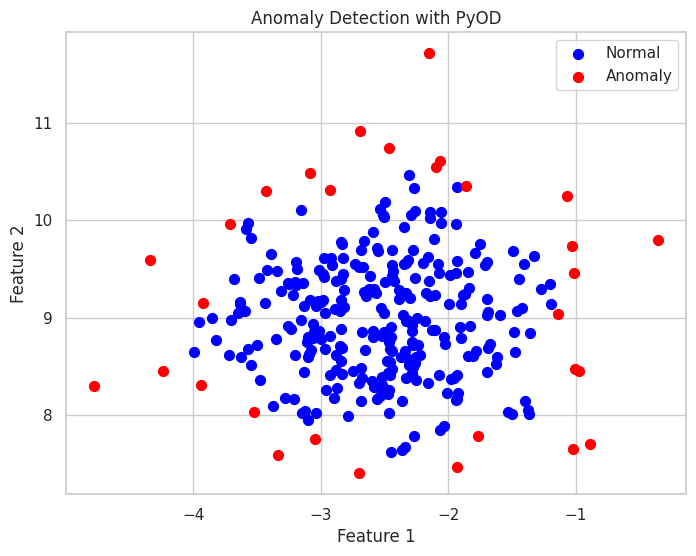

In [9]:
# Separate anomalies and normal points
anomalies = data[data['Anomaly'] == 1]
normal = data[data['Anomaly'] == 0]

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(normal['Feature_1'], normal['Feature_2'], c='blue', s=50, label='Normal')
plt.scatter(anomalies['Feature_1'], anomalies['Feature_2'], c='red', s=50, label='Anomaly')
plt.title("Anomaly Detection with PyOD")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()